In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [64]:
df = pd.read_csv('./save/ipsc_perturbation_sampling_search_1024_masks_RECON_REF_multi_cells_v2.csv', index_col = 0)#.iloc[6:]
df_oksm = pd.read_csv('./save/ipsc_perturbation_sampling_search_oksm_1024_masks_RECON_REF_multi_cells_v2.csv', index_col = 0)

In [65]:
df_oksm['cell'] = 0
df_oksm['cell'] = df_oksm.reset_index()['index'].apply(lambda x: int(x[-x[::-1].index('_'):])).values

In [66]:
df_oksm['gene'] = df_oksm.reset_index()['index'].apply(lambda x: x[:-x[::-1].index('_')-1]).values

In [67]:
df_oksm_mean = df_oksm.groupby('gene').mean()
df_oksm.groupby('gene').agg(['mean','std'])


euclid_distance_D0-fm     pearson_corr_D0-fm      \
                                            mean std               mean std   
gene                                                                          
KLF4_POU5F1_MYC_NANOG                     0.4230 NaN           0.949016 NaN   
SOX2_KLF4_MYC_NANOG                       0.4272 NaN           0.948544 NaN   
SOX2_KLF4_POU5F1_MYC                      0.4240 NaN           0.948931 NaN   
SOX2_KLF4_POU5F1_MYC_NANOG                0.4246 NaN           0.948967 NaN   
SOX2_KLF4_POU5F1_NANOG                    0.4243 NaN           0.948261 NaN   
SOX2_POU5F1_MYC_NANOG                     0.4246 NaN           0.948955 NaN   

                           euclid_distance_D20-nr     pearson_corr_D20-nr      \
                                             mean std                mean std   
gene                                                                            
KLF4_POU5F1_MYC_NANOG                      0.5063 NaN            0.924986 NaN   
SOX2_KLF4_MYC_NANOG                        0.5005 NaN            0.924657 NaN   
SOX2_KLF4_POU5F1_MYC                       0.5005 NaN            0.924718 NaN   
SOX2_KLF4_POU5F1_MYC_NANOG                 0.5000 NaN            0.924747 NaN   
SOX2_KLF4_POU5F1_NANOG                     0.5117 NaN            0.924141 NaN   
SOX2_POU5F1_MYC_NANOG                      0.5005 NaN            0.924778 NaN   

                           euclid_distance_P20-nr      ...  \
                                             mean std  ...   
gene                                                   ...   
KLF4_POU5F1_MYC_NANOG                      0.5566 NaN  ...   
SOX2_KLF4_MYC_NANOG                        0.5454 NaN  ...   
SOX2_KLF4_POU5F1_MYC                       0.5464 NaN  ...   
SOX2_KLF4_POU5F1_MYC_NANOG                 0.5454 NaN  ...   
SOX2_KLF4_POU5F1_NANOG                     0.5645 NaN  ...   
SOX2_POU5F1_MYC_NANOG                      0.5464 NaN  ...   

                           euclid_distance_D4-fm     pearson_corr_D4-fm      \
                                            mean std               mean std   
gene                                                                          
KLF4_POU5F1_MYC_NANOG                     0.4363 NaN           0.944168 NaN   
SOX2_KLF4_MYC_NANOG                       0.4377 NaN           0.943610 NaN   
SOX2_KLF4_POU5F1_MYC                      0.4350 NaN           0.944030 NaN   
SOX2_KLF4_POU5F1_MYC_NANOG                0.4353 NaN           0.944055 NaN   
SOX2_KLF4_POU5F1_NANOG                    0.4390 NaN           0.943423 NaN   
SOX2_POU5F1_MYC_NANOG                     0.4355 NaN           0.944085 NaN   

                           euclid_distance_P3-nr     pearson_corr_P3-nr      \
                                            mean std               mean std   
gene                                                                          
KLF4_POU5F1_MYC_NANOG                     0.5005 NaN           0.926438 NaN   
SOX2_KLF4_MYC_NANOG                       0.4954 NaN           0.926040 NaN   
SOX2_KLF4_POU5F1_MYC                      0.4950 NaN           0.926144 NaN   
SOX2_KLF4_POU5F1_MYC_NANOG                0.4946 NaN           0.926210 NaN   
SOX2_KLF4_POU5F1_NANOG                    0.5063 NaN           0.925578 NaN   
SOX2_POU5F1_MYC_NANOG                     0.4954 NaN           0.926234 NaN   

                            cell      
                            mean std  
gene                                  
KLF4_POU5F1_MYC_NANOG       10.0 NaN  
SOX2_KLF4_MYC_NANOG         10.0 NaN  
SOX2_KLF4_POU5F1_MYC        10.0 NaN  
SOX2_KLF4_POU5F1_MYC_NANOG  10.0 NaN  
SOX2_KLF4_POU5F1_NANOG      10.0 NaN  
SOX2_POU5F1_MYC_NANOG       10.0 NaN  

[6 rows x 26 columns]

In [68]:
oksm_mask = ['SOX2' in i or'KLF4' in i or 'MYC' in i or 'POU5F1'in i or 'NANOG'in i for i in df.index.tolist()]
oksm_mask2 = [sum(gene in i for gene in ['SOX2', 'KLF4', 'MYC', 'POU5F1', 'NANOG']) >= 2 for i in df.index.tolist()]
np.sum(oksm_mask)

6

In [69]:
df.shape

(400, 12)

In [70]:
for t in ['euclid_distance', 'pearson_corr']:
    order = []
    for time in ['D0-fm','D4-fm','D8-fm','D20-nr','P3-nr','P20-nr']:
        order.append(f'{t}_{time}')
    #print(df.loc[:,order].round(3).head(10).to_latex(index=True, float_format=f"%.3f"))
df.loc[:,order].round(3).head(10)

,pearson_corr_D0-fm,pearson_corr_D4-fm,pearson_corr_D8-fm,pearson_corr_D20-nr,pearson_corr_P3-nr,pearson_corr_P20-nr
LCORL_CXXC4_MIER3,0.949,0.944,0.943,0.924,0.926,0.916
ZNF730_KLF12_TRAF5,0.947,0.942,0.942,0.924,0.925,0.915
CYTL1_GPBP1_ZNF267,0.948,0.943,0.943,0.925,0.926,0.917
ZNF175_CTH_PRMT3,0.948,0.943,0.943,0.924,0.926,0.916
ZNF566_CC2D1B_HOXA11,0.948,0.943,0.943,0.925,0.926,0.917
MAFG_FOXA3_ZNF641,0.948,0.943,0.943,0.924,0.926,0.916
TBX3_NRIP3_OSR2,0.948,0.944,0.943,0.926,0.927,0.919
RBBP7_ATRX_ZNF267,0.949,0.944,0.943,0.925,0.927,0.917
ZNF655_TP53BP1_ZNF644,0.948,0.943,0.943,0.924,0.925,0.916
SETDB1_OGG1_BTRC,0.946,0.940,0.940,0.920,0.922,0.912


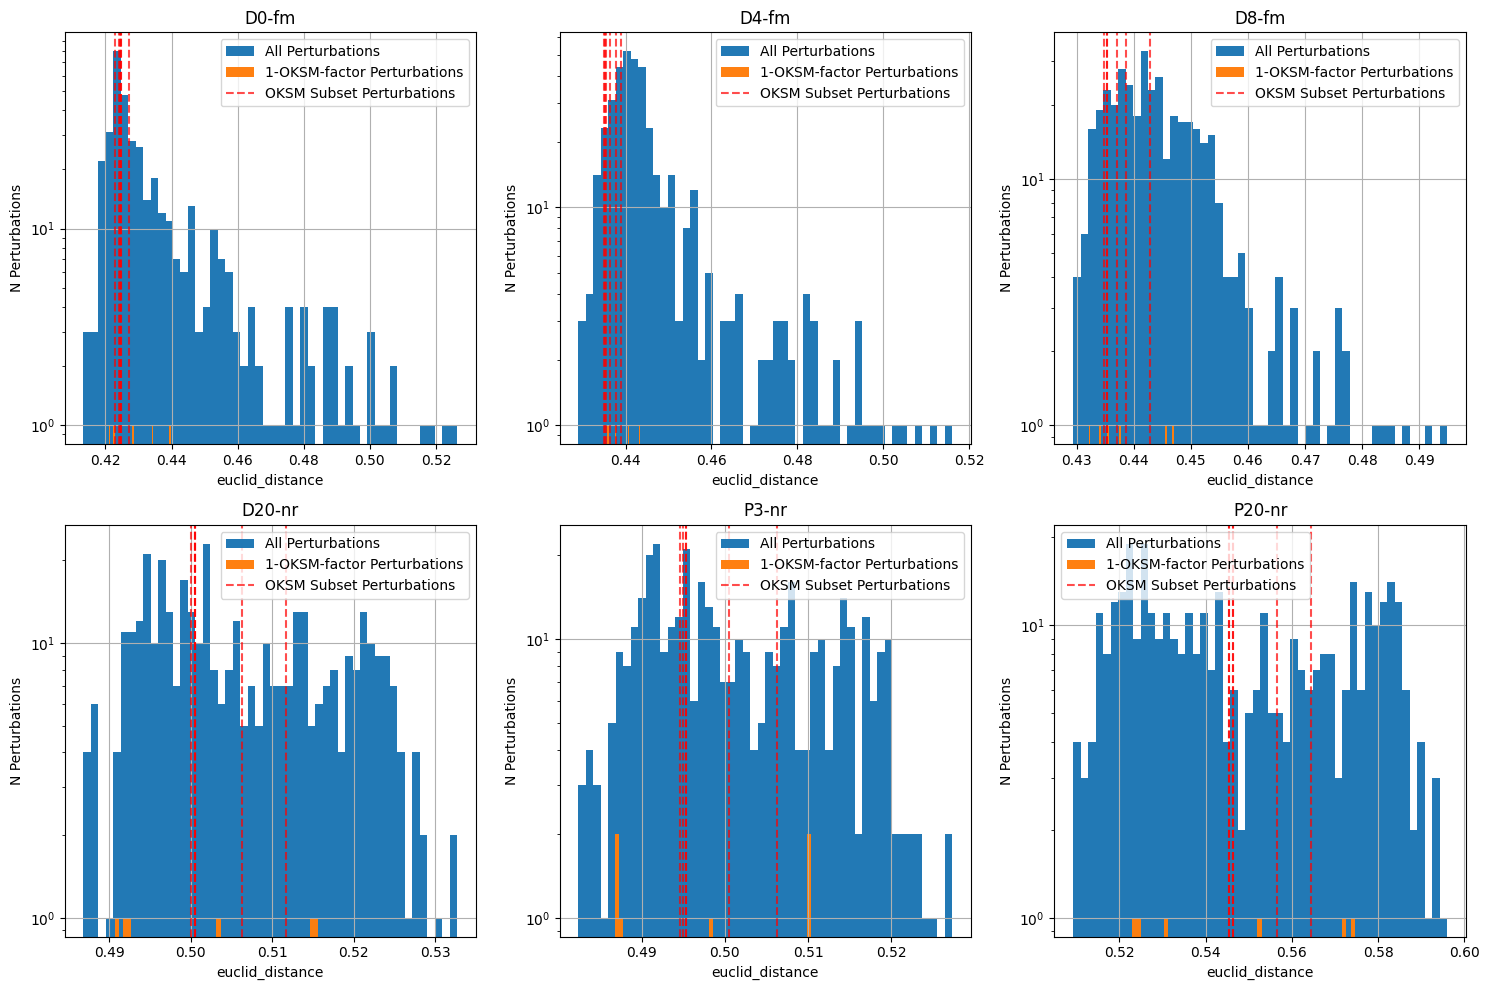

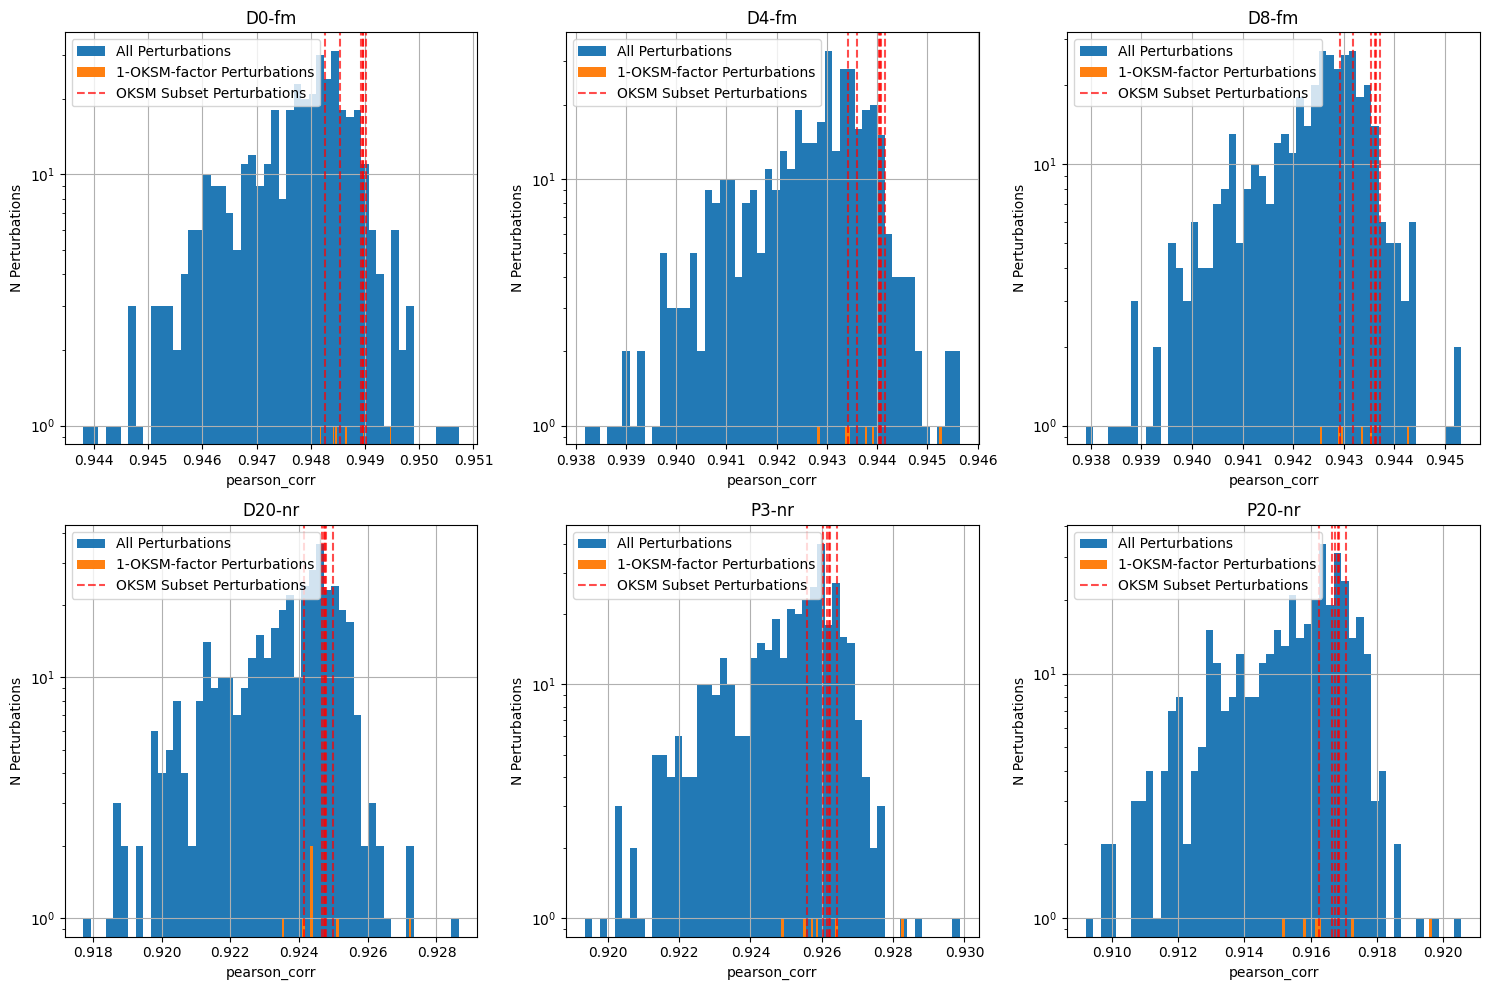

In [71]:
# Parameters
for sim_type in ['euclid_distance', 'pearson_corr']:
    repr_points = ['D0-fm', 'D4-fm', 'D8-fm', 'D20-nr', 'P3-nr', 'P20-nr']
    
    # Create subplots
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows and 3 columns
    axes = axes.flatten()  # Flatten to easily iterate over axes
    
    # Loop over each representation point and plot histogram
    for i, repr_point in enumerate(repr_points):
        ax = axes[i]  # Get the specific subplot axis
        
        # Plot histograms on the specific axis
        df.loc[:, f'{sim_type}_{repr_point}'].hist(bins=50, log=True, ax=ax, alpha=0.99, label='All Perturbations')
        df.loc[oksm_mask, f'{sim_type}_{repr_point}'].hist(bins=50, log=True, ax=ax, alpha=0.99, label='1-OKSM-factor Perturbations')
        #df.loc[oksm_mask, f'{sim_type}_{repr_point}'].hist(bins=50, log=True, ax=ax, alpha=0.99, label='OKSM-containing Perturbations')
    
        # Plot df_oksm as vertical dashed red lines with labels
        label = 'OKSM Subset Perturbations'
        for value in df_oksm_mean[f'{sim_type}_{repr_point}']:
            ax.axvline(value, color='red', linestyle='--', alpha=0.7, label=label)
            label=None
        
        # Set labels and title
        ax.set_xlabel(sim_type)
        ax.set_ylabel('N Perturbations')
        ax.set_title(f'{repr_point}')
        ax.legend()
    
    # Adjust layout for better spacing
    plt.tight_layout()
    plt.savefig(f'./save/pert_ipsc_corr_panel_MULTI_CELL_{sim_type}.png',bbox_inches='tight')
    plt.show()

In [69]:
f = ['eucl' in i for i in df.columns]

In [70]:
rep_order = ['pearson_corr_D0-fm', 'pearson_corr_D4-fm', 'pearson_corr_D8-fm', 'pearson_corr_D20-nr','pearson_corr_P3-nr','pearson_corr_P20-nr']
rep_order_eu = ['euclid_distance_D0-fm', 'euclid_distance_D4-fm', 'euclid_distance_D8-fm', 'euclid_distance_D20-nr','euclid_distance_P3-nr','euclid_distance_P20-nr']
#rep_order = ['pearson_corr_D0-fm', 'pearson_corr_D8-fm', 'pearson_corr_D20-nr','pearson_corr_P20-nr']

<Axes: >

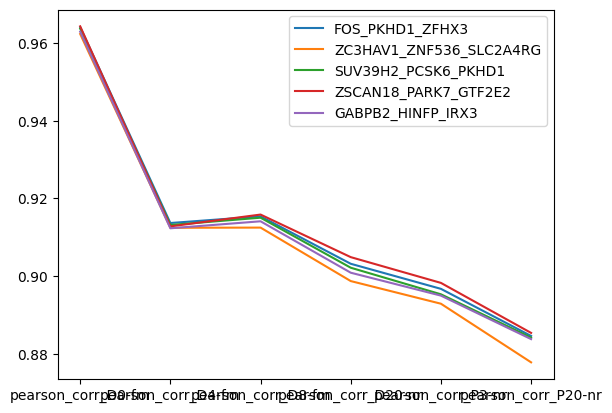

In [71]:
df.sort_values(by = ['euclid_distance_D0-fm', 'euclid_distance_P20-nr'], ascending=True).loc[:,rep_order].head().T.plot()

Text(0, 0.5, 'Pearson Correlation')

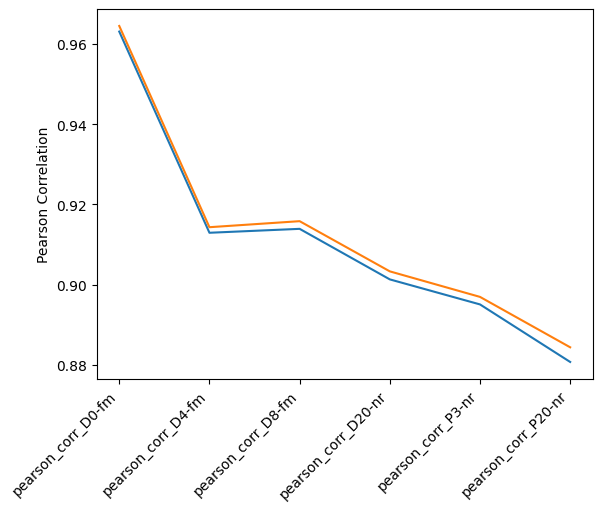

In [72]:
df.loc[:,rep_order].mean().T.plot()
df_oksm.loc[:,rep_order].mean().T.plot()
plt.xticks(rotation=45,ha='right')
plt.ylabel('Pearson Correlation')
#plt.savefig('./rand10perts_corr.pdf',bbox_inches='tight')

#plt.xticks(rotation=45,ha='right')
#plt.ylabel('Pearson Correlation')
#plt.savefig('./OKSMperts_corr.pdf',bbox_inches='tight');

In [73]:
df.corr().loc[~np.array(f),~np.array(f)]

,pearson_corr_D0-fm,pearson_corr_D20-nr,pearson_corr_P20-nr,pearson_corr_D8-fm,pearson_corr_D4-fm,pearson_corr_P3-nr
pearson_corr_D0-fm,1.000000,0.899757,0.903046,0.926685,0.825797,0.833927
pearson_corr_D20-nr,0.899757,1.000000,0.942791,0.975362,0.912478,0.956312
pearson_corr_P20-nr,0.903046,0.942791,1.000000,0.952369,0.871752,0.901862
pearson_corr_D8-fm,0.926685,0.975362,0.952369,1.000000,0.931301,0.938289
pearson_corr_D4-fm,0.825797,0.912478,0.871752,0.931301,1.000000,0.951926
pearson_corr_P3-nr,0.833927,0.956312,0.901862,0.938289,0.951926,1.000000


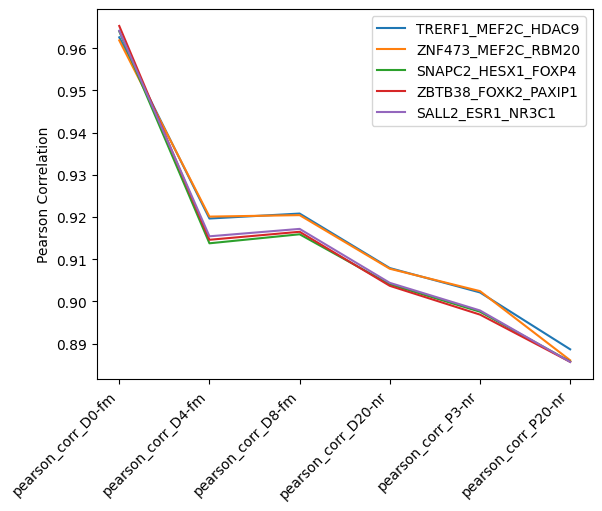

In [84]:
df.loc[:,~np.array(f)].sort_values(by='pearson_corr_P20-nr', ascending=False).head(5).loc[:,rep_order].T.plot()
plt.xticks(rotation=45,ha='right')
plt.ylabel('Pearson Correlation');

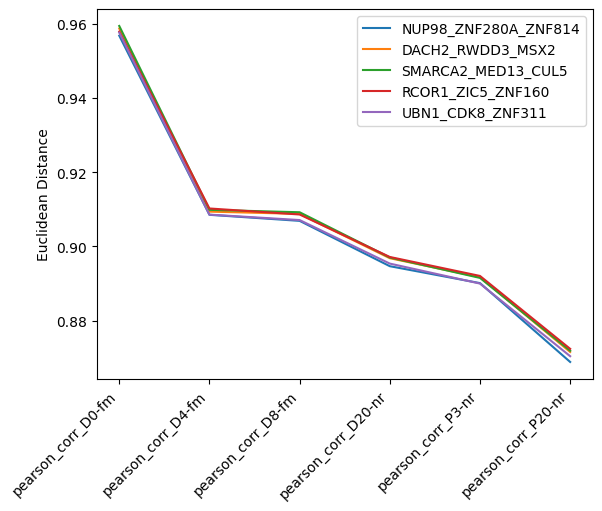

In [85]:
df.sort_values(by='euclid_distance_P20-nr', ascending=False).loc[:,~np.array(f)].head(5).loc[:,rep_order].T.plot()
plt.xticks(rotation=45,ha='right')
plt.ylabel('Euclidean Distance');

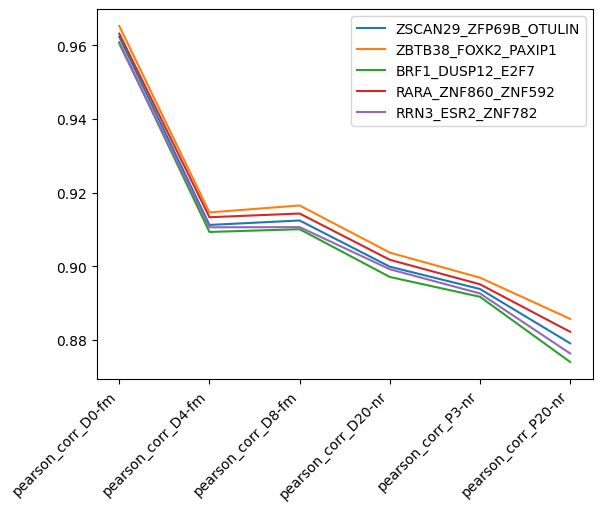

In [76]:
df_m = df.copy()
df_m['pearson_corr_D0-fm'] = - df_m['pearson_corr_D0-fm'] 
df_m = df_m.sort_values(by=['pearson_corr_D0-fm', 'pearson_corr_P20-nr'], ascending=False)
df.loc[:,rep_order].head(5).T.plot()
plt.xticks(rotation=45, ha='right');

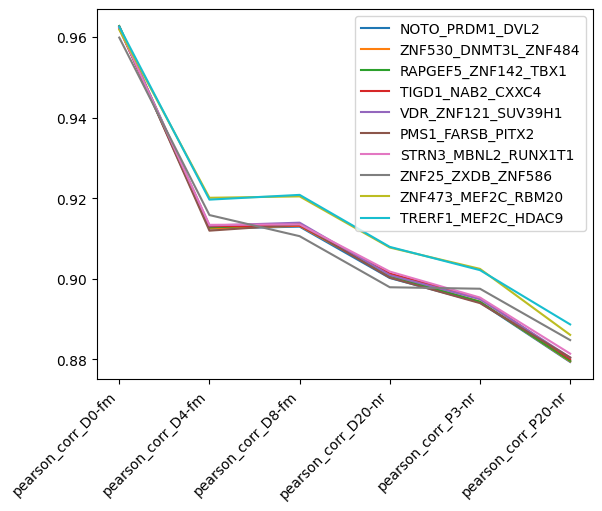

In [77]:
df.loc[:,rep_order].sort_values('pearson_corr_D0-fm').head(100).sort_values(by='pearson_corr_P20-nr').tail(10).T.plot()
plt.xticks(rotation=45, ha='right');